# Hypothesis와 Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)

df = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/potato.csv')
sample = np.array(df['무게'])
display(sample)

s_mean = np.mean(sample)
display(s_mean)

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

128.451

In [2]:
rv = stats.norm(130, np.sqrt(9/14))
display(rv.isf(0.95))

z = (s_mean - 130) / np.sqrt(9/14)
display(z)

rv = stats.norm()
display(rv.isf(0.95))

display(rv.cdf(z))

128.681

-1.932

-1.645

0.027

In [3]:
z = (s_mean - 130) / np.sqrt(9/14)
display(z)

rv = stats.norm()
display(rv.interval(0.95))

display(rv.cdf(z) * 2)


-1.932

(-1.960, 1.960)

0.053

In [4]:
rv = stats.norm(130, 3)

c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:
        cnt += 1
cnt / n_samples


0.053

In [5]:
rv = stats.norm(128, 3)

c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
        
cnt / n_samples


0.197

In [6]:
training_rel = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/training_rel.csv')
print(training_rel.shape)
training_rel.head()

(20, 2)


,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [7]:
training_rel['차'] = training_rel['후'] - training_rel['전']
print(training_rel.head())

t, p = stats.ttest_1samp(training_rel['차'], 0)
print(p)

t, p = stats.ttest_rel(training_rel['후'], training_rel['전'])
print(p)


    전   후   차
0  59  41 -18
1  52  63  11
2  55  68  13
3  61  59  -2
4  59  84  25
0.04004419061842953
0.04004419061842953


In [8]:
training_ind = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/training_ind.csv')
print(training_ind.shape)
print(training_ind.head())

t, p = stats.ttest_ind(training_ind['A'], training_ind['B'],
                       equal_var=False)
print(p)


(20, 2)
    A   B
0  47  49
1  50  52
2  37  54
3  60  48
4  39  51
0.08695731107259362


In [9]:
training_rel = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/training_rel.csv')
toy_df = training_rel[:6].copy()
toy_df

,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84
5,45,37


In [10]:
diff = toy_df['후'] - toy_df['전']
toy_df['차'] = diff
print(toy_df)

rank = stats.rankdata(abs(diff)).astype(int)
toy_df['순위'] = rank
print(toy_df)

r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

print(r_minus, r_plus)


    전   후   차
0  59  41 -18
1  52  63  11
2  55  68  13
3  61  59  -2
4  59  84  25
5  45  37  -8
    전   후   차  순위
0  59  41 -18   5
1  52  63  11   3
2  55  68  13   4
3  61  59  -2   1
4  59  84  25   6
5  45  37  -8   2
8 13


In [11]:
toy_df['후'] = toy_df['전'] + np.arange(1, 7)
diff = toy_df['후'] - toy_df['전']
rank = stats.rankdata(abs(diff)).astype(int)
toy_df['차'] = diff
toy_df['순위'] = rank
print(toy_df)

r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

print(r_minus, r_plus)

toy_df['후'] = toy_df['전'] + [1, -2, -3, 4, 5, -6]
diff = toy_df['후'] - toy_df['전']
rank = stats.rankdata(abs(diff)).astype(int)
toy_df['차'] = diff
toy_df['순위'] = rank
print(toy_df)


    전   후  차  순위
0  59  60  1   1
1  52  54  2   2
2  55  58  3   3
3  61  65  4   4
4  59  64  5   5
5  45  51  6   6
0 21
    전   후  차  순위
0  59  60  1   1
1  52  50 -2   2
2  55  52 -3   3
3  61  65  4   4
4  59  64  5   5
5  45  39 -6   6


In [12]:
r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

print(r_minus, r_plus)

T, p = stats.wilcoxon(training_rel['전'], training_rel['후'])
print(p)

T, p = stats.wilcoxon(training_rel['후'] - training_rel['전'])
print(p)


11 10
0.03623390197753906
0.039989471435546875


In [13]:
n = 10000
diffs = np.round(stats.norm(3, 4).rvs(size=(n, 20)))

cnt = 0
alpha = 0.05
for diff in diffs:
    t, p = stats.ttest_1samp(diff, 0)
    if p < alpha:
        cnt += 1
print(cnt / n)

cnt = 0
alpha = 0.05
for diff in diffs:
    T, p = stats.wilcoxon(diff)
    if p < alpha:
        cnt += 1
print(cnt / n)


0.8831


c:\DEV\adspenv\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


0.8731


In [14]:
training_ind = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/training_ind.csv')
toy_df = training_ind[:5].copy()
toy_df


,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [15]:
rank = stats.rankdata(np.concatenate([toy_df['A'],
                                      toy_df['B']]))
rank_df = pd.DataFrame({'A': rank[:5],
                        'B': rank[5:10]}).astype(int)
print(rank_df)

n1 = len(rank_df['A'])
u = rank_df['A'].sum() - (n1*(n1+1))/2
print(u)

rank_df = pd.DataFrame(np.arange(1, 11).reshape(2, 5).T,
                       columns=['A', 'B'])
print(rank_df)


    A  B
0   3  5
1   6  8
2   1  9
3  10  4
4   2  7
7.0
   A   B
0  1   6
1  2   7
2  3   8
3  4   9
4  5  10


In [16]:
u = rank_df['A'].sum() - (n1*(n1+1))/2
print(u)

rank_df = pd.DataFrame(np.arange(1, 11).reshape(2, 5)[::-1].T,
                       columns=['A', 'B'])
print(rank_df)

u = rank_df['A'].sum() - (n1*(n1+1))/2
print(u)

u, p = stats.mannwhitneyu(training_ind['A'], training_ind['B'],
                          alternative='two-sided')
print(p)

0.0
    A  B
0   6  1
1   7  2
2   8  3
3   9  4
4  10  5
25.0
0.05948611166127324


In [17]:
ad_df = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/ad.csv')
n = len(ad_df)
print(n)
print(ad_df.head())

ad_cross = pd.crosstab(ad_df['광고'], ad_df['구입'])
print(ad_cross)

1000
  광고      구입
0  B  하지 않았다
1  B  하지 않았다
2  A      했다
3  A      했다
4  B  하지 않았다
구입  하지 않았다  했다
광고            
A      351  49
B      549  51


In [18]:
print(ad_cross['했다'] / (ad_cross['했다'] + ad_cross['하지 않았다']))

n_not, n_yes = ad_cross.sum()
print(n_not, n_yes)

n_adA, n_adB = ad_cross.sum(axis=1)
print(n_adA, n_adB)

ad_ef = pd.DataFrame({'했다': [n_adA * n_yes / n,
                              n_adB * n_yes / n],
                      '하지 않았다': [n_adA * n_not / n,
                                   n_adB * n_not / n]},
                      index=['A', 'B'])
print(ad_ef)


광고
A    0.1225
B    0.0850
dtype: float64
900 100
400 600
     했다  하지 않았다
A  40.0   360.0
B  60.0   540.0


In [19]:
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
print(y)
rv = stats.chi2(1)
print(1 - rv.cdf(y))

chi2, p, dof, ef = stats.chi2_contingency(ad_cross,
                                          correction=False)
print(chi2, p, dof)

print(ef)


3.75
0.052807511416113395
3.75 0.052807511416113395 1
[[360.  40.]
 [540.  60.]]


# Q
어떤 인터넷 쇼핑몰의 상품 20개의 상품평이 있고 ‘좋아요＇가 11개 또는 ‘싫어요＇가 9개다. 이 상품이 좋다는 주장을 검정하라. 유의수준은 10%다.


In [20]:
import scipy.stats as stats

N = 20
mu = 0.5

# Initialize the binomial distribution
rv = stats.binom(N, mu)

# Calculate the probability of more than 10 successes
probability_more_than_10_successes = 1 - rv.cdf(11 - 1)

probability_more_than_10_successes

0.412

# Q
데이터 사이언스 스쿨 수업을 들었는가의 여부가 나중에 대학원에서 머신러닝 수업의 학점과 상관관계가 있는지를 알기 위해 데이터를 구한 결과가 다음과 같다고 하자.
데이터 사이언스 스쿨 수업을 듣지 않은 경우, X가 0이면 A,B,C 학점(Y값)을 받은 학생의 분포가 4,16,20이다.
데이터 사이언스 스쿨 수업을 들은 사람의 경우, X가 1일 때 A,B,C 학점(Y값)을 받은 학생의 분포가 23, 18, 19이다.

이 결과로부터 데이터 사이언틋 스쿨 수업을 들었는가의 여부가 머신러닝 수업의 학점과 상관관계가 있다고 말할 수 있는가?

In [21]:
import numpy as np
import scipy.stats as stats

obs = np.array([
    [4, 16, 20],
    [23, 18, 19]
])

result = stats.chi2_contingency(obs)
print(result[1])


0.00704786570249751


# 상관분석

In [22]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 3)

df = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/student_scores.csv',
                 index_col='student number')

en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [23]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,...,product of deviations
student,,,
A,42,...,83.2
B,69,...,120.4
C,56,...,-8.4
D,41,...,117.6
E,57,...,9.2
F,48,...,79.8
G,65,...,96.0
H,49,...,32.4
I,65,...,66.0


In [24]:
summary_df['product of deviations'].mean()

62.800

In [25]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [26]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [27]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [28]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

In [29]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.819

In [30]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [31]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


# Q

In [32]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/bike.csv")
df = df.iloc[:, 4:].copy()
df.head(2)

,weather,...,count
0,1,...,16
1,1,...,40


In [33]:
df[["temp", "atemp"]].corr()

,temp,atemp
temp,1.000000,0.984948
atemp,0.984948,1.000000


In [34]:
df[["weather", "humidity"]].corr(method = "kendall")

,weather,humidity
weather,1.000000,0.324066
humidity,0.324066,1.000000


In [35]:
df[["weather", "humidity"]].corr(method = "spearman")

,weather,humidity
weather,1.000000,0.399492
humidity,0.399492,1.000000


In [36]:
df.corr().round(2)

,weather,...,count
weather,1.00,...,-0.13
temp,-0.06,...,0.39
atemp,-0.06,...,0.39
humidity,0.41,...,-0.32
windspeed,0.01,...,0.10
casual,-0.14,...,0.69
registered,-0.11,...,0.97
count,-0.13,...,1.00


In [37]:
df["temp"].corr(other = df["atemp"])

0.985

# Q붓꽃 데이터에서 다음 상관계수를 계산하라.

꽃받침 길이와 꽃받침 폭 사이의 상관계수
꽃잎 길이와 꽃잎 폭 사이의 상관계수
꽃받침 폭과 꽃잎 폭 사이의 상관게수


In [38]:
from sklearn.datasets import load_iris
from scipy.stats import pearsonr

X = load_iris().data

x1 = X[:, 0]
x2 = X[:, 1]
x3 = X[:, 2]
x4 = X[:, 3]

In [39]:
pearsonr(x1, x2)[0]

-0.118

In [40]:
pearsonr(x3, x4)[0]

0.963

In [41]:
pearsonr(x2, x4)[0]

-0.366

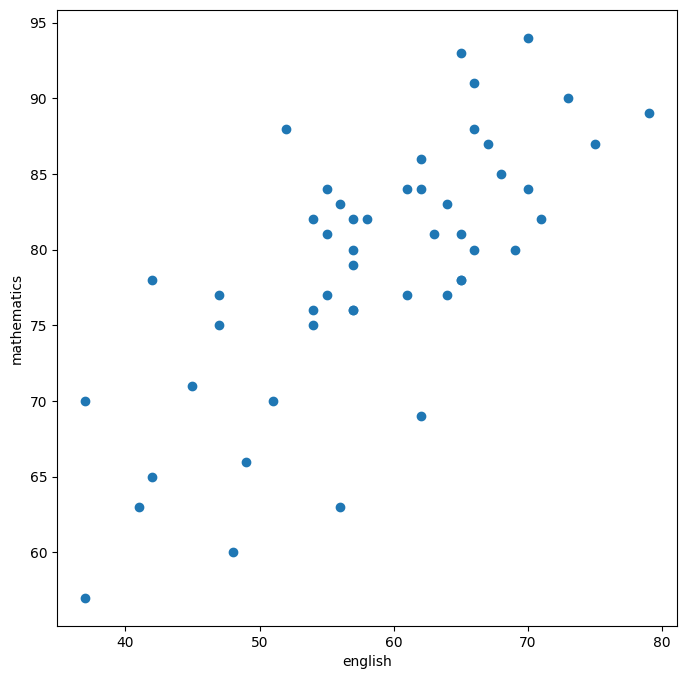

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 3)

df = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/student_scores.csv',
                 index_col='student number')

english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

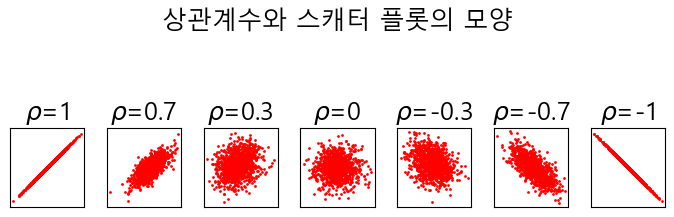

In [43]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

from sklearn.datasets import load_iris
import scipy as sp
import scipy.stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

X = load_iris().data
x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭
sp.stats.pearsonr(x1, x3)[0] # 계수의 첫 번째 값(상관 계수)를 반환

np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$\rho$={}".format(r))

plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

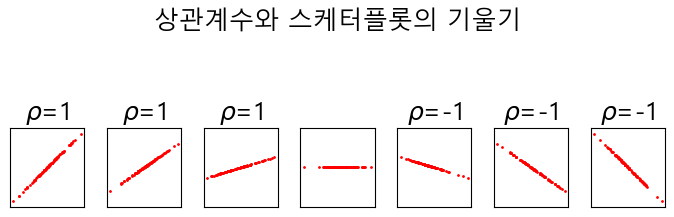

In [44]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 2))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(r"$\rho$=1")
    if s < 0:
        plt.title(r"$\rho$=-1")

plt.suptitle("상관계수와 스케터플롯의 기울기", y=1.1)
plt.tight_layout()
plt.show()

# 회귀분석(Regression Analysis)

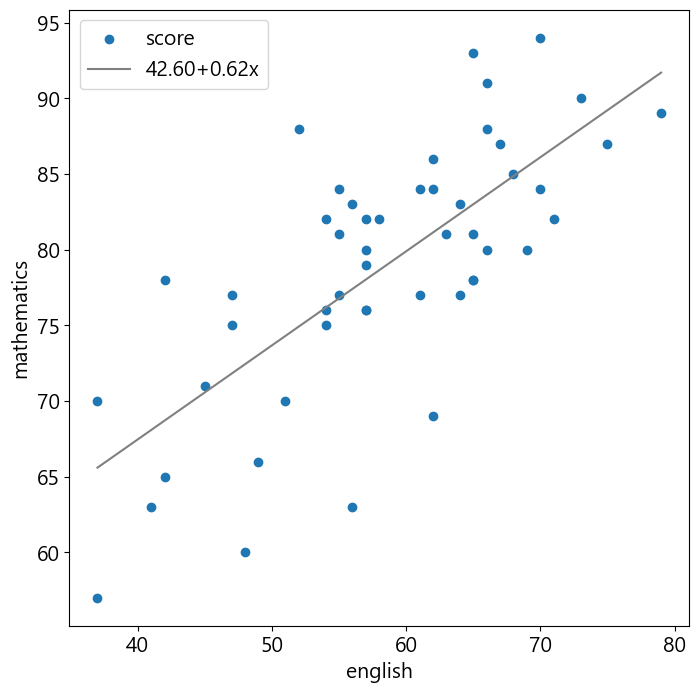

In [45]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

In [46]:
import numpy as np

# 데이터프레임 다루기 
import pandas as pd
# 기초 통계분석 패키지
from scipy import stats
# 그래프 그리기  
import matplotlib.pyplot as plt
#회귀분석 가능 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 직업만족도
# survey 변수들:  name gender  income  English  jobSatisfaction  stress
df = pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/survey.csv")

# 가상의 분석자료로 회귀분석 결과 구하기 
model = smf.ols(formula = 'jobSatisfaction ~ English', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        jobSatisfaction   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.266
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.147
Time:                        14:53:31   Log-Likelihood:                -36.243
No. Observations:                  23   AIC:                             76.49
Df Residuals:                      21   BIC:                             78.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7052      1.615      3.532      0.0

In [47]:
import numpy as np

# 데이터프레임 다루기 
import pandas as pd
# 기초 통계분석 패키지
from scipy import stats
# 그래프 그리기  
import matplotlib.pyplot as plt
#회귀분석 가능 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 직업만족도
# survey 변수들:  name gender  income  English  jobSatisfaction  stress
df = pd.read_csv("https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/survey.csv")

# 독립표본 t-검정
# 변수생성
male = df.income[df.gender == "m"] # 남성
female = df.income[df.gender == "f"] # 여성

#Levene의 등분산 검정 
l_result = stats.levene(male, female)

# 유의 수준 표시하기 
if l_result[1] > .05:
    print('P value는 %f 로 95 수준에서 유의하지 않음' % l_result[1])
else :
    print('P value는 %f 로 95 percent 수준에서 유의함' % l_result[1])

print( '남성', round(male.mean(),2), '여성',round(female.mean(),2),'\n등분산검정 결과 LeveneResult(F) : %.3f \np-value : %.3f' % (l_result)) 

# 가상의 분석자료로 회귀분석 결과 구하기 
model = smf.ols(formula = 'jobSatisfaction ~ English + stress + income', data = df)
result = model.fit()
print(result.summary())

P value는 0.258716 로 95 수준에서 유의하지 않음
남성 4285.64 여성 4333.11 
등분산검정 결과 LeveneResult(F) : 1.348 
p-value : 0.259
                            OLS Regression Results                            
Dep. Variable:        jobSatisfaction   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.458
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.258
Time:                        14:53:31   Log-Likelihood:                -35.038
No. Observations:                  23   AIC:                             78.08
Df Residuals:                      19   BIC:                             82.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

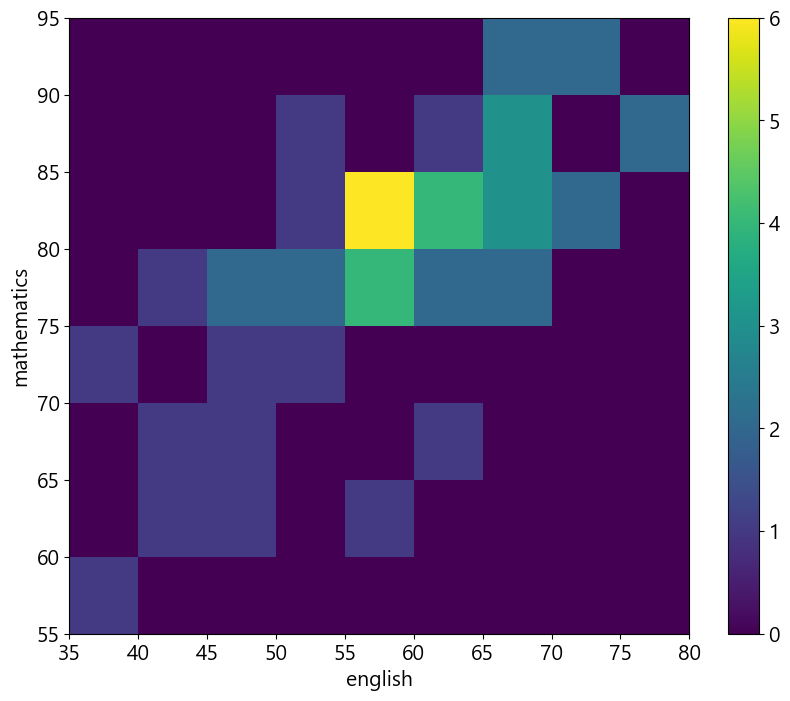

In [48]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/kznetwork/DataAnalysis/main/datasets/scores_reg.csv')
n = len(df)
print(n)
df.head()


20


,quiz,...,school_method
0,4.2,...,bus
1,7.2,...,bicycle
2,0.0,...,bus
3,3.0,...,walk
4,1.5,...,walk


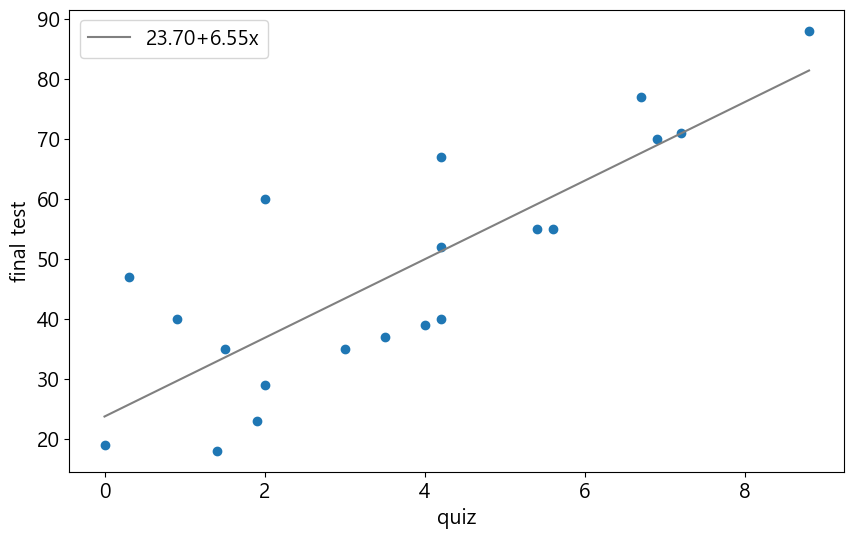

In [50]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [51]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           8.59e-06
Time:                        14:53:33   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [53]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat)

y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

s_var = np.var(eps_hat, ddof=p+1)
print(s_var)


23.69949534673121 6.553732606043083
134.29043473495898


C:\Users\k8s\AppData\Local\Temp\ipykernel_1560\138354279.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


In [54]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.714, 1.069)

In [55]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
print(lcl, hcl)

rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
print(lcl, hcl)

13.796091272760245 33.60289942070218
4.308720637125891 8.798744574960276


In [56]:
t = beta1_hat / np.sqrt(s_var * C1)
print(t)

print((1 - rv.cdf(t)) * 2)

6.1330992745320225
8.590875866687497e-06


In [57]:
t = beta0_hat / np.sqrt(s_var * C0)
print(t)


print((1 - rv.cdf(t)) * 2)


5.027644206440127
8.745298393209033e-05


In [58]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           6.19e-06
Time:                        14:53:34   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat, beta2_hat)

y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
print(lcl, hcl)


-1.8709143470996055 6.428878343002368 4.191706546398688
0.4402533325434743 7.9431597602539


C:\Users\k8s\AppData\Local\Temp\ipykernel_1560\529307447.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


In [60]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           7.47e-05
Time:                        14:53:34   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           8.59e-06
Time:                        14:53:34   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
y_hat = np.array(result.fittedvalues)
print(y_hat)

eps_hat = np.array(result.resid)
print(eps_hat)

print(np.sum(eps_hat ** 2))


[51.225 70.886 23.699 43.361 33.53  29.598 36.152 46.638 49.914 59.09
 51.225 68.92  36.807 81.372 25.666 67.61  51.225 60.4   32.875 36.807]
[ 15.775   0.114  -4.699  -8.361   1.47   10.402 -13.152  -9.638 -10.914
  -4.09  -11.225   1.08   -7.807   6.628  21.334   9.39    0.775  -5.4
 -14.875  23.193]
2417.2278252292626


In [63]:

total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

print(total_var, exp_var + unexp_var)

print(exp_var / total_var)

print(np.corrcoef(x, y)[0, 1] ** 2)


7468.55 7468.5499999999965
0.6763457665504996
0.6763457665504999


In [64]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))


0.658

In [65]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
print(f)

rv = stats.f(p, n-p-1)
print(1 - rv.cdf(f))


37.61490671126521
8.590875866687497e-06


0.030870000000000022


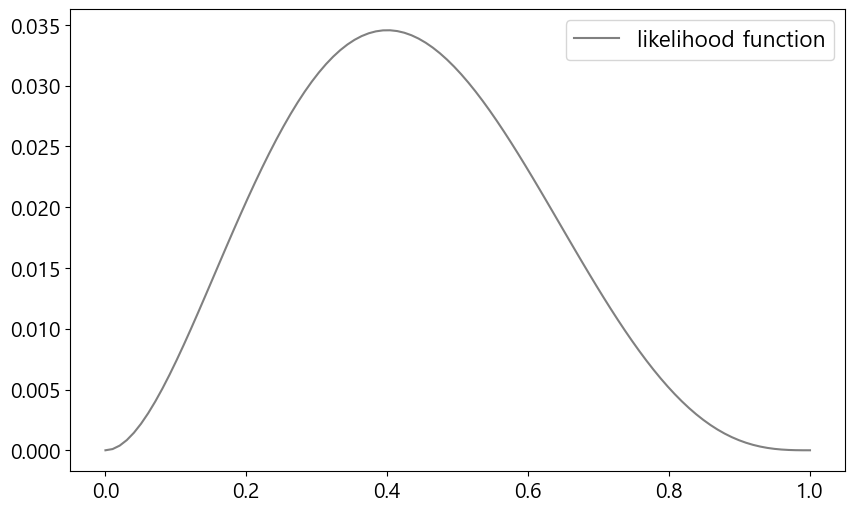

In [66]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
print(L)

ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()


In [67]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
print(mll )

rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
print(mll)

aic = -2 * mll + 2 * (p+1)
print(aic)

bic = -2 * mll + np.log(n) * (p+1) 
print(bic)


-3.365058335046282
-76.32521428624038
156.65042857248076
158.64189311958876


In [68]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
print(result.summary())

eps_hat = np.array(result.resid)
print(eps_hat)

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           6.19e-06
Time:                        14:53:35   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.8

In [69]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.508

In [70]:
df['mid_test'] = df['quiz'] * 2
print(df.head())

formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
print(result.summary())


   quiz  ...  mid_test
0   4.2  ...       8.4
1   7.2  ...      14.4
2   0.0  ...       0.0
3   3.0  ...       6.0
4   1.5  ...       3.0

[5 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           8.59e-06
Time:                        14:53:36   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

In [71]:
print(stats.skew(eps_hat))

print(stats.kurtosis(eps_hat, fisher=False))


0.6599489486177472
2.4365833256763034


# Q


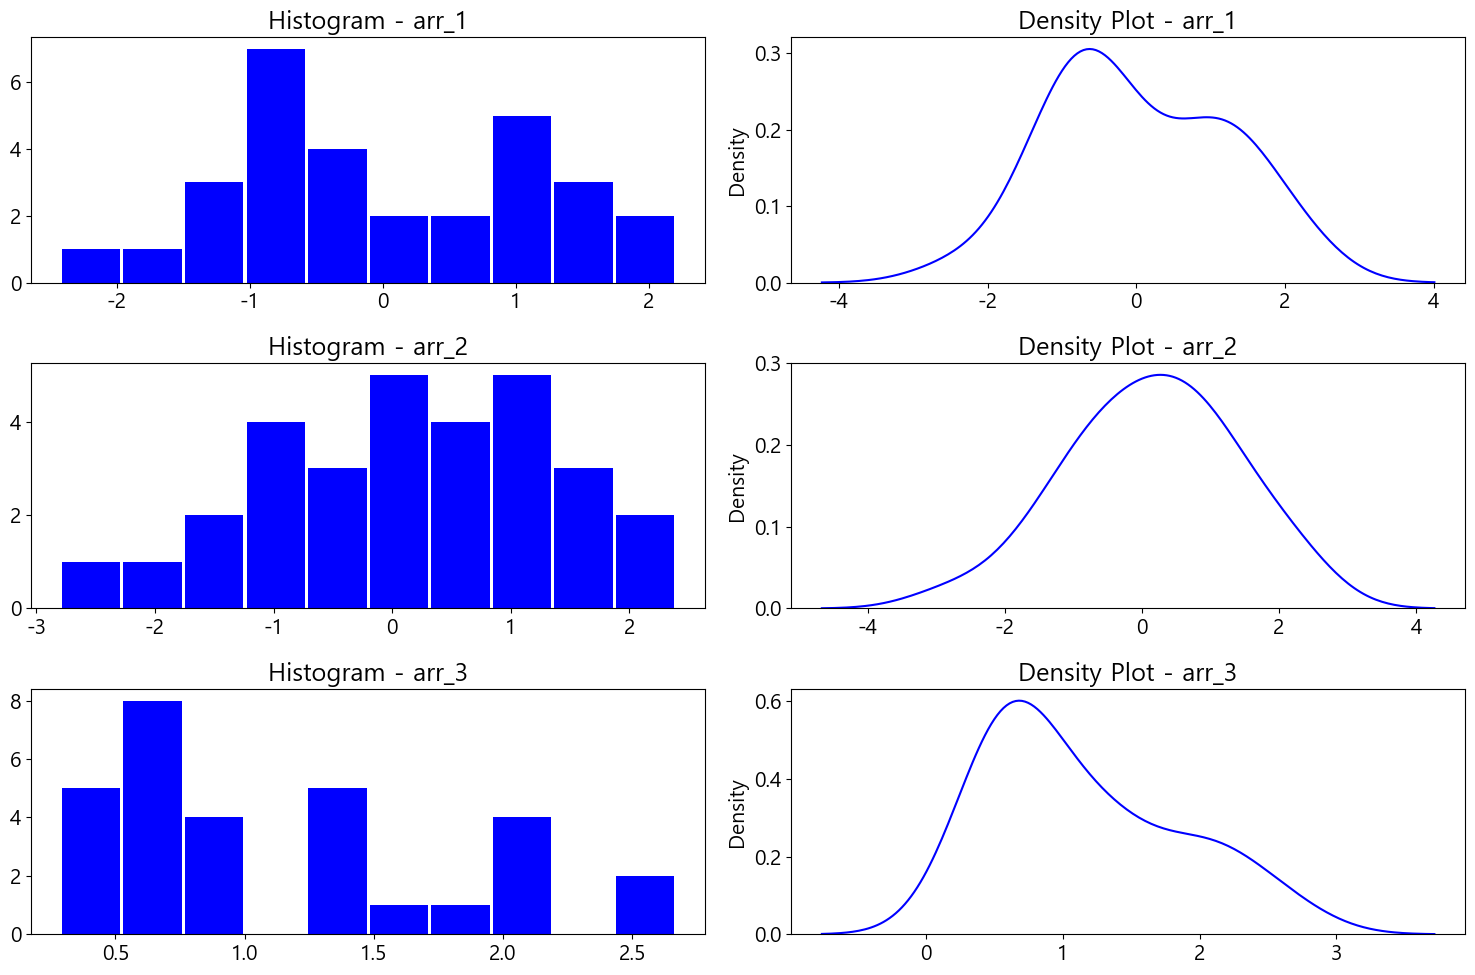

In [72]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)
arr_1 = np.random.normal(size = 30)
arr_1[:5]
## array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

arr_2 = np.random.normal(size = 30)
arr_2[:5]
## array([-0.25561937, -2.79858911, -1.7715331 , -0.69987723,  0.92746243])

arr_3 = np.random.f(10, 15, size = 30)
arr_3[:5]
## array([0.5028127 , 1.32641573, 0.49140284, 2.48931422, 0.84462236])
fig, axes = plt.subplots(3, 2, figsize = (15, 10))

axes[0, 0].hist(arr_1, bins = 10, color = "blue", rwidth=0.95)
axes[0, 0].set_title("Histogram - arr_1")

sns.kdeplot(arr_1, ax = axes[0, 1], color = "blue")
axes[0, 1].set_title("Density Plot - arr_1")

axes[1, 0].hist(arr_2, bins = 10, color = "blue", rwidth=0.95)
axes[1, 0].set_title("Histogram - arr_2")

sns.kdeplot(arr_2, ax = axes[1, 1], color = "blue")
axes[1, 1].set_title("Density Plot - arr_2")

axes[2, 0].hist(arr_3, bins = 10, color = "blue", rwidth=0.95)
axes[2, 0].set_title("Histogram - arr_3")

sns.kdeplot(arr_3, ax = axes[2, 1], color = "blue")
axes[2, 1].set_title("Density Plot - arr_3")

plt.tight_layout()
plt.show()

In [73]:
stats.shapiro(arr_1) # 검정통계량, p-value
## ShapiroResult(statistic=0.9621370434761047, pvalue=0.35087570548057556)

stats.shapiro(arr_2) # 검정통계량, p-value
## ShapiroResult(statistic=0.9874829649925232, pvalue=0.9716595411300659)

stats.shapiro(arr_3) # 검정통계량, p-value
## ShapiroResult(statistic=0.8935506343841553, pvalue=0.0058619617484509945)

ShapiroResult(statistic=0.8935506343841553, pvalue=0.0058619617484509945)

In [74]:
list(stats.kstest(arr_1, "norm")) # stat, p
## [0.1660065953344917, 0.3416826717395778]

list(stats.kstest(arr_2, "norm")) # stat, p
## [0.14678998077653516, 0.49213767629370864]

list(stats.kstest(arr_3, "norm")) # stat, p
## [0.631637421230662, 3.9808958610654024e-12]

[0.632, 0.000]

In [75]:
from statsmodels.stats.diagnostic import lilliefors

lilliefors(arr_1, dist = "norm") # 검정통계량, p-value
## (0.1550327809120738, 0.06267433158337248)

lilliefors(arr_2, dist = "norm")
## (0.061677319274631826, 0.99)

lilliefors(arr_3, dist = "norm")
## (0.17379146937757062, 0.02164780082850969)

(0.174, 0.022)

In [76]:
stat, arr_c, arr_lv = stats.anderson(arr_1, dist = "norm")
print(stat)
## 0.5078567066925821

df_result = pd.DataFrame([arr_c, arr_lv]).transpose()
df_result.columns = ["critical_values", "significance_level"]
df_result["reject"] = df_result["critical_values"] < stat
df_result

0.5078567066925821


,critical_values,significance_level,reject
0,0.521,15.0,False
1,0.593,10.0,False
2,0.712,5.0,False
3,0.830,2.5,False
4,0.988,1.0,False


In [77]:
stats.jarque_bera(arr_1) # 검정통계량, p-value
## SignificanceResult(statistic=0.9766068804921089, pvalue=0.6136666336336749)

stats.jarque_bera(arr_2) # 검정통계량, p-value
## SignificanceResult(statistic=0.3851809149153991, pvalue=0.8248197037354764)

stats.jarque_bera(arr_3) # 검정통계량, p-value
## SignificanceResult(statistic=3.2771308782900626, pvalue=0.19425851816374295)

SignificanceResult(statistic=3.2771308782900626, pvalue=0.19425851816374295)